# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.1'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/Users/benreichelt/anaconda3/envs/tf2/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
vgg16 = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

model = tf.keras.models.Sequential([
  vgg16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu', name = 'dense_feature'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
_________________________________________________________________


#### [5 points] Train Model

In [5]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

opt = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(train_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, validation_data = 
                    valid_batches, validation_steps=STEP_SIZE_VALID)

22
6


/Users/benreichelt/anaconda3/envs/tf2/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/benreichelt/anaconda3/envs/tf2/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - 70s 3s/step - loss: 1.5843 - accuracy: 0.2039 - val_loss: 1.3858 - val_accuracy: 0.3200
Epoch 2/100
21/21 [==============================] - 79s 4s/step - loss: 1.4542 - accuracy: 0.2961 - val_loss: 1.3780 - val_accuracy: 0.3200
Epoch 3/100
21/21 [==============================] - 73s 3s/step - loss: 1.4205 - accuracy: 0.3010 - val_loss: 1.3735 - val_accuracy: 0.3000
Epoch 4/100
21/21 [==============================] - 74s 4s/step - loss: 1.4723 - accuracy: 0.3058 - val_loss: 1.3648 - val_accuracy: 0.2200
Epoch 5/100
21/21 [==============================] - 74s 4s/step - loss: 1.4189 - accuracy: 0.2621 - val_loss: 1.3308 - val_accuracy: 0.4800
Epoch 6/100
21/21 [==============================] - 72s 3s/step - loss: 1.3896 - accuracy: 0.2961 - val_loss: 1.3303 - val_accuracy: 0.3200
Epoch 7/100
21/21 [==============================] - 71s 3s/step - loss: 1.3759 - accuracy: 0.3689 - val_loss: 1.3468 - val_accuracy: 0.4000
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 70s 3s/step - loss: 0.8609 - accuracy: 0.6311 - val_loss: 0.8657 - val_accuracy: 0.6000
Epoch 60/100
21/21 [==============================] - 71s 3s/step - loss: 0.7792 - accuracy: 0.6748 - val_loss: 0.7734 - val_accuracy: 0.6000
Epoch 61/100
21/21 [==============================] - 70s 3s/step - loss: 0.8781 - accuracy: 0.6019 - val_loss: 0.7220 - val_accuracy: 0.6600
Epoch 62/100
21/21 [==============================] - 68s 3s/step - loss: 0.8086 - accuracy: 0.6359 - val_loss: 0.8538 - val_accuracy: 0.5400
Epoch 63/100
21/21 [==============================] - 69s 3s/step - loss: 0.8211 - accuracy: 0.5874 - val_loss: 0.7102 - val_accuracy: 0.6400
Epoch 64/100
21/21 [==============================] - 68s 3s/step - loss: 0.8377 - accuracy: 0.6311 - val_loss: 0.7680 - val_accuracy: 0.6000
Epoch 65/100
21/21 [==============================] - 68s 3s/step - loss: 0.8056 - accuracy: 0.6602 - val_loss: 0.6730 - val_accuracy: 0.7400
Epoch 

#### [5 points] Plot Accuracy and Loss During Training

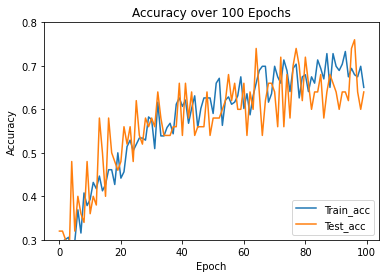

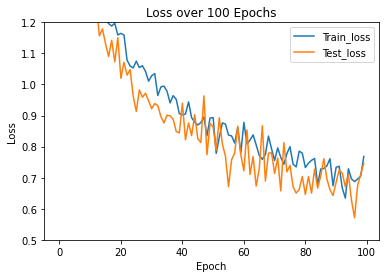

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'Test_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 0.8])
plt.legend(loc='lower right')
plt.title('Accuracy over 100 Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'Test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.2])
plt.legend(loc='upper right')
plt.title('Loss over 100 Epochs')
plt.show()

#### Testing Model

In [20]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 4s 110ms/step - loss: 0.8244 - accuracy: 0.6111
Test loss: 0.8243839740753174
Test accuracy: 0.6111111044883728


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 270 samples in 0.004s...
[t-SNE] Computed neighbors for 270 samples in 0.083s...
[t-SNE] Computed conditional probabilities for sample 270 / 270
[t-SNE] Mean sigma: 1.866734
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.831902
[t-SNE] KL divergence after 1000 iterations: 0.451694


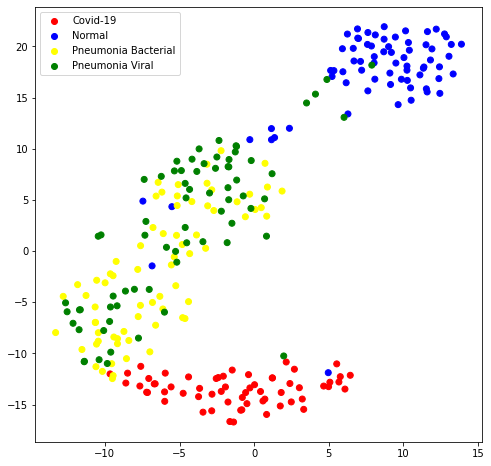

In [29]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

intermediate = intermediate_layer_model.predict(tsne_eval_generator) 

intermediate_tsne = TSNE(n_components=2, n_iter=1000, verbose=1).fit_transform(intermediate)

actual_classes = tsne_eval_generator.classes
actual_colors = []
for i in actual_classes:
    if i == 0:
        actual_colors.append('red')
    elif i == 1:
        actual_colors.append('blue')
    elif i == 2: 
        actual_colors.append('yellow')
    else:
        actual_colors.append('green')
        
# in actual_classes list:        
# 0 - 60 = covid - 0
# 61 - 130 = Normal - 1
# 131 - 200 = Pnemonia bacterial - 2
# 201 - 270 = Pnemonia Viral - 3

x = intermediate_tsne[:,0]        
y = intermediate_tsne[:,1] 

plt.figure(figsize=(8, 8))
plt.scatter(x, y, color = actual_colors)
plt.scatter(x[0], y[0], color = actual_colors[0], label = 'Covid-19')
plt.scatter(x[65], y[65], color = actual_colors[65], label = 'Normal')
plt.scatter(x[140], y[140], color = actual_colors[140], label = 'Pneumonia Bacterial')
plt.scatter(x[210], y[210], color = actual_colors[210], label = 'Pneumonia Viral')
plt.legend(loc='upper left')
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->